In [29]:
#importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#set the random seed for reproducibility
np.random.seed(45)

In [31]:
#generating time index for 365 days
days = np.arange(365)


In [32]:
#linear upward trend
trend = 0.1 * days

In [33]:
#Weekly seasonlity (7-day sinewave)
seasonal = 10 * np.sin(days * 2 * np.pi / 7)

In [34]:
#Random gaussian noise
noise = np.random.normal(0, 2, size=len(days))

In [35]:
#combining the components to create the time series
time_series = trend + seasonal + noise

In [37]:
#create dataframe
data = pd.DataFrame({'Day': days, 'Value': time_series})

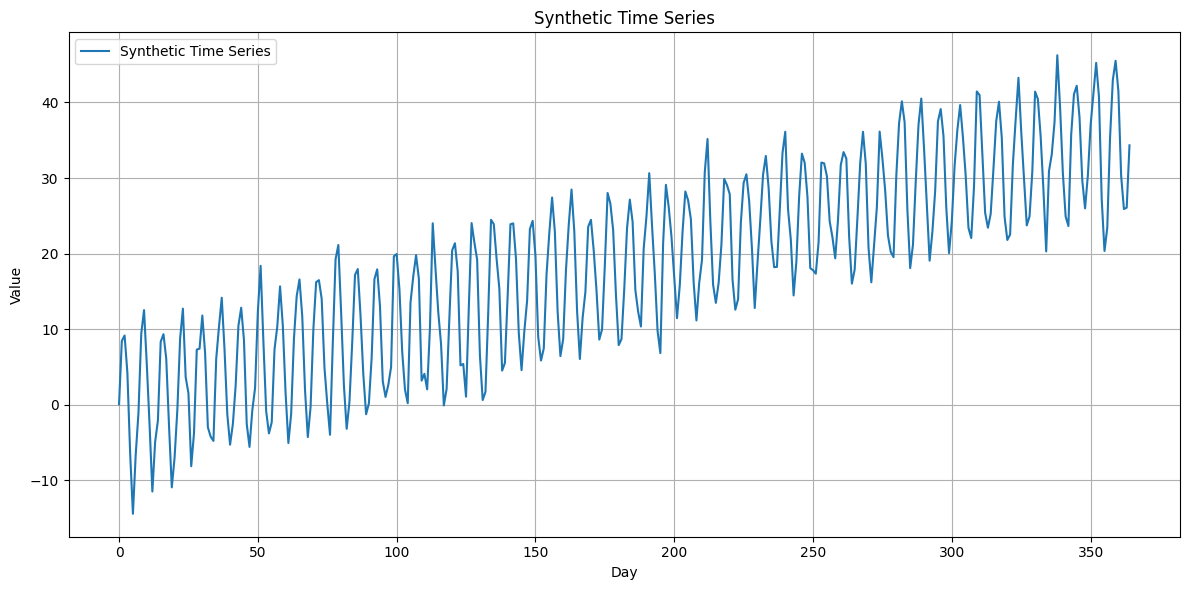

In [39]:
#plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data["Day"], data["Value"], label="Synthetic Time Series")
plt.title("Synthetic Time Series")
plt.xlabel("Day")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
#2 time series decomposition
#perform addictive decomposition
decomposition = seasonal_decompose(data["Value"], model='additive', period=7)

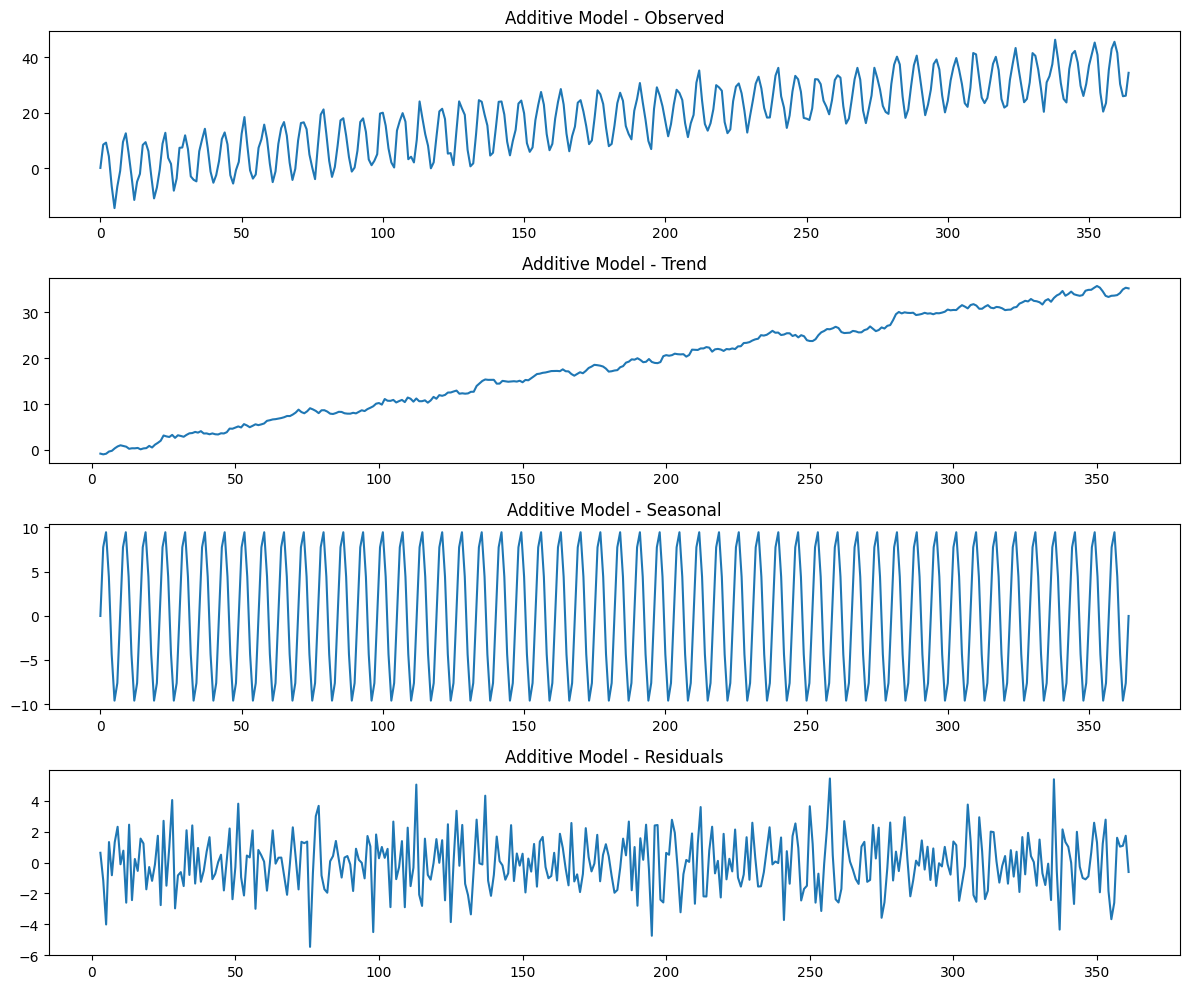

In [41]:
#plot the decomposition
fig, axs = plt.subplots(4, 1, figsize=(12, 10))
axs[0].plot(decomposition.observed)
axs[0].set_title("Additive Model - Observed")
axs[1].plot(decomposition.trend)
axs[1].set_title("Additive Model - Trend")
axs[2].plot(decomposition.seasonal)
axs[2].set_title("Additive Model - Seasonal")
axs[3].plot(decomposition.resid)
axs[3].set_title("Additive Model - Residuals")
plt.tight_layout()

In [ ]:
# which model captures seasonality better?
#In this case, the seasonal component plot does a good job of capturing the weekly seasonality patterns, the sinusoidal wave is clearly visible and consistent across the time series.
#Are residuals centered around zero?
#Yes, the residuals plot shows that most fluctuations are scattered around the zero line, while there are occasional spikes, the majority of points are balanced above and below zero, indicating that the decomposition captured most of the trend and seasonality, leaving behind noise that is centered around zero.

In [56]:
#forecasting technique
#importing packages

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
# set seed
np.random.seed(45)

In [58]:
#generate time index
days = np.arange(425)

In [59]:
#create syntethic time series with trend, seasonality and noise
trend = 0.1 * days
seasonality = 10 * np.sin(2 * np.pi * days / 7)
noise = np.random.normal(loc=0, scale=3, size=425)
time_series = trend + seasonality + noise

In [60]:
#creating a dataframe
df = pd.DataFrame({"Day": days, "Value": time_series})

In [61]:
#spliting the data
train = df["Value"][:365]
test = df["Value"][365:]

In [62]:
#moving average (7-day)
moving_avg_forecast = np.full(60, train[-7:].mean())

In [63]:
#simple exponential smoothing
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.2, optimized=False)
ses_forecast = ses_model.forecast(60)

In [64]:
#ARIMA(1,1,1)

arima_model = ARIMA(train, order=(1,1,1)).fit()
arima_forecast = arima_model.forecast(60)

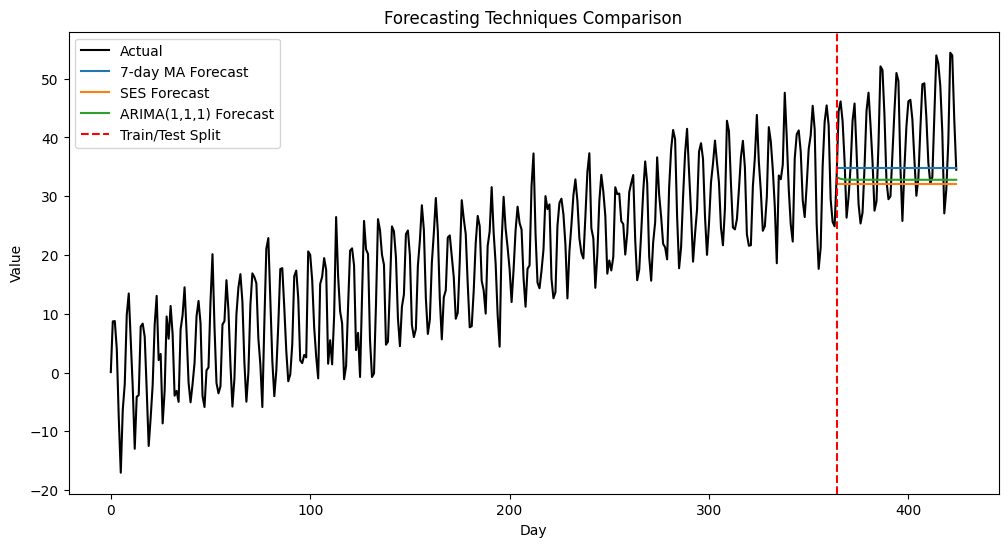

In [65]:
#plot forecast vs actual

plt.figure(figsize=(12,6))
plt.plot(df["Day"], df["Value"], label="Actual", color="black")
plt.plot(df["Day"][365:], moving_avg_forecast, label="7-day MA Forecast")
plt.plot(df["Day"][365:], ses_forecast, label="SES Forecast")
plt.plot(df["Day"][365:], arima_forecast, label="ARIMA(1,1,1) Forecast")
plt.axvline(x=364, color="red", linestyle="--", label="Train/Test Split")
plt.xlabel("Day")
plt.ylabel("Value")
plt.title("Forecasting Techniques Comparison")
plt.legend()
plt.show()

In [68]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, mape

results = {
    "7-day MA": evaluate(test, moving_avg_forecast),
    "SES": evaluate(test, ses_forecast),
    "ARIMA(1,1,1)": evaluate(test, arima_forecast)
}

results_df = pd.DataFrame(results, index=["MAE","MSE","MAPE"]).T
print(results_df)

                   MAE         MSE       MAPE
7-day MA      7.804295   89.994931  18.801923
SES           9.064565  122.974241  20.971199
ARIMA(1,1,1)  8.673600  112.543659  20.233583


In [ ]:
#Which model performs best?
#Based on the evaluation metrics (MAE, MSE, MAPE) presented in the results, 7-day Moving average seems to perform the best among the three forecasting techniques, as it has the lowest values across all three metrics.

In [ ]:
#Why does SES flatten after training?
#SES flatten because it only considers the level component of the time series and does not account for trend or seasonality. After training, the SES model projects future values based on the last estimated level, resulting in a flat forecast line. This is particularly evident in time series with strong trend or seasonal patterns, where SES may not capture these dynamics effectively, leading to a constant forecast that does not reflect the underlying changes in the data.

In [ ]:
#what do decomposition residuals reveal?
#Residuals are the portion of the time series that remains after removing the estimated trend and seasonal components. if they look random and centered around zero, it indicates that the decomposition has effectively captured the underlying patterns in the data. If there are discernible patterns or trends in the residuals, it suggests that some information is still left unexplained by the model, indicating that further refinement or a different modeling approach may be necessary to better capture the time series dynamics.

In [ ]:
#How does ARIMA handle seasonality vs Moving average?
#ARIMA can handle seasonality indirectly through lagged terms and differencing, but it is not inherently designed for seasonal data(SARIMA) for strong periodic pattern. A moving average in the other hand, smooths out short-term fluctuations and highlights longer-term trends or cycles, making it less effective for capturing seasonal patterns unless the window size is carefully chosen to match the seasonality period.

In [ ]:
#Real world use cases for each method
#moving average: normally used in different financial markets to smooth out price data and identify trend over time.
#SES: commonly used in inventory management and supply chain forecasting to predict future demand based on past
#ARIMA: same with moving average, it can be used as well for financial markets, it is also widely used in economics (e.g., GDP Growth forecasting, inflation rates, unemployment rates, etc.) and in weather forecasting where data shows autocorrelation and pattern over time.

In [ ]:
#Discussion Questions:
#why us decomposing time series importannt before forecasting?
#Decomposing helps to identify and understand the underlying patterns in the data, such as trend, seasonlity, or irregular components (noise). By isolating these components, we can choose more appropriate forecasting models that specifically address each aspect of the time series. For example, if a time series has a strong seasonal component, using a model that accounts for seasonality (like SARIMA) will likely yield better forecasts than a model that does not. Additionally, decomposition can help in diagnosing issues with the data, such as non-stationarity, which can affect the performance of certain forecasting methods. Overall, decomposing a time series provides valuable insights that can lead to more accurate and reliable forecasts.

In [ ]:
#What are the ARIMA's limitation in seasonal data scenarios?
#ARIMA models are not inherently designed to handle seasonality. 
